#### Time Series Analysis with Stats Models

In [ ]:
# Hidrick-Prescott filter - separates a time-series y_t into a trend component
# tau_T and a cyclical component c_t

# Trend
# Seasonality
# Cyclical - Trends with no set repetition

In [7]:
from statsmodels.tsa.filters.hp_filter import hpfilter
import numpy as np
import pandas as pd
%matplotlib inline

C:\Users\Christian\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
df =pd.read_csv("./UDEMY_TSA_FINAL/Data/macrodata.csv", index_col = 0, parse_dates = True)
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


#### Plot Real GDP

<AxesSubplot:>

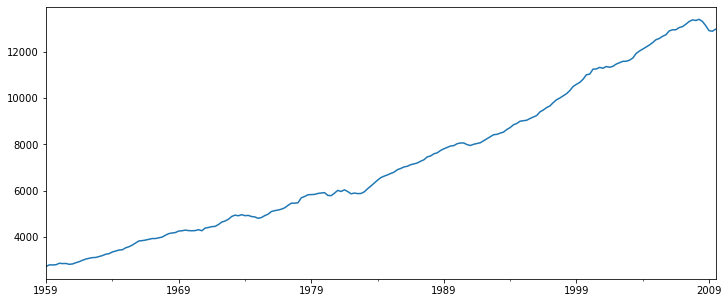

In [5]:
df["realgdp"].plot(figsize = (12, 5))

#### Hidrick-Prescott filter - separates a time-series y_t into a trend component

In [10]:
gdp_cycle, gdp_trend = hpfilter(df["realgdp"],lamb = 1600)

In [12]:
type(gdp_trend)

pandas.core.series.Series

In [14]:
df["Trend"] = gdp_trend
df["Cycle"] = gdp_cycle

<AxesSubplot:>

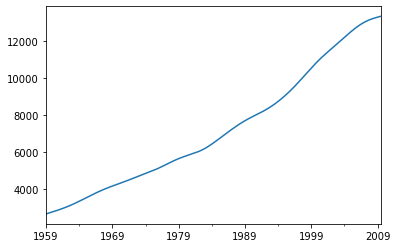

In [15]:
df["Trend"].plot() #The Trend

<AxesSubplot:>

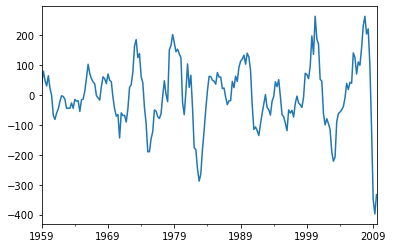

In [16]:
df["Cycle"].plot()

<AxesSubplot:>

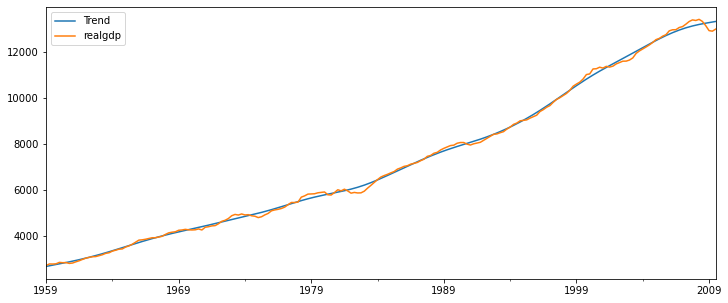

In [17]:
df[["Trend", "realgdp"]].plot(figsize = (12, 5))

#### Zoom In to 2005 -

<AxesSubplot:>

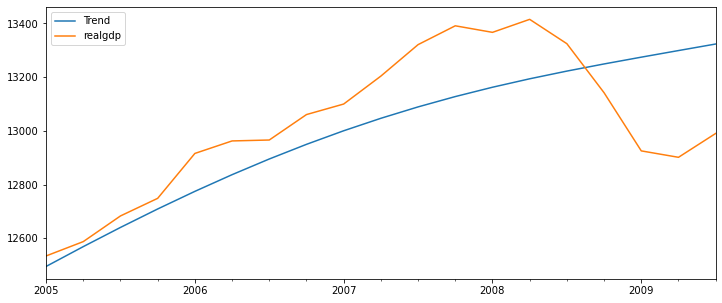

In [18]:
df[["Trend", "realgdp"]]["2005-01-01":].plot(figsize = (12, 5))

### ETL Models (Error-Trend-Seasonality)
* Exponential Smoothing
* Trend Methods Models
* ETS Decomposition

In [28]:
airline = pd.read_csv("./UDEMY_TSA_FINAL/Data/airline_passengers.csv", index_col = "Month", parse_dates = True)
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [29]:
airline.isnull().sum()

Thousands of Passengers    0
dtype: int64

In [30]:
airline_dropna = airline.dropna()
airline_dropna.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<AxesSubplot:xlabel='Month'>

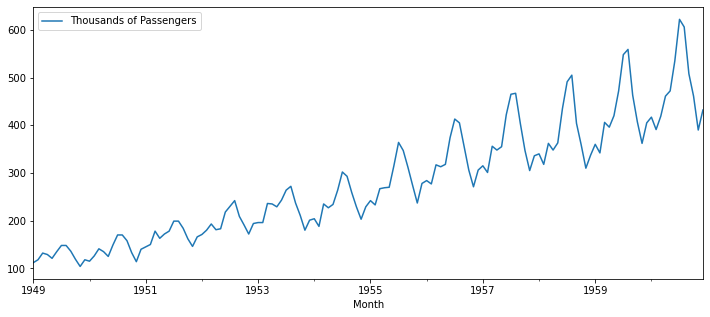

In [32]:
airline.plot(figsize = (12, 5))

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [35]:
result = seasonal_decompose(airline["Thousands of Passengers"], model = "multiplicative")

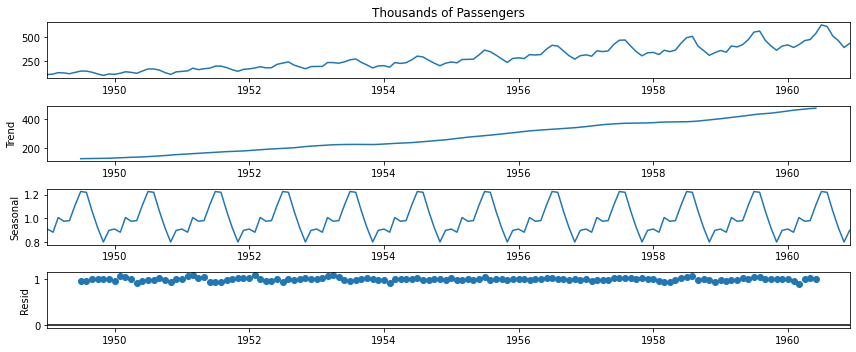

In [41]:
from pylab import rcParams
rcParams["figure.figsize"] = 12, 5
result.plot();

<AxesSubplot:xlabel='Month'>

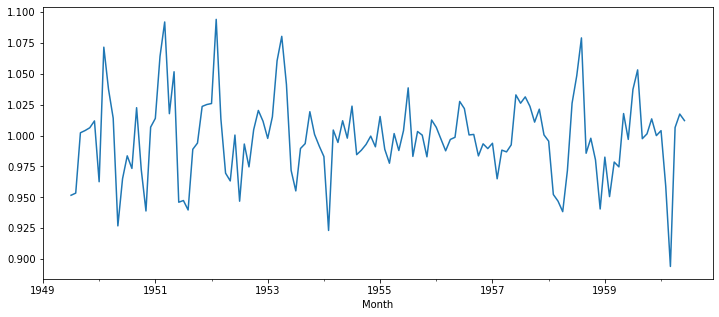

In [42]:
result.resid.plot()

#### EWMA Models
Exponentially Weighted Moving Average Models

EWMA will allow us to reduct the lag effect from Simple Moving Average and it will put more weight on values that occured more recently (by applying more weight to the more recent values, thus the name)

In [45]:
airline = pd.read_csv("./UDEMY_TSA_FINAL/Data/airline_passengers.csv", index_col = "Month")
airline.dropna(inplace = True)
airline.head()

,Thousands of Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


In [46]:
airline.index = pd.to_datetime(airline.index)
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [47]:
airline.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

#### Creating a 6 and 12 Month Moving Ave column

In [48]:
airline["6-month-SMA"] = airline["Thousands of Passengers"].rolling(window = 6).mean()
airline["12-month-SMA"] = airline["Thousands of Passengers"].rolling(window = 12).mean()

<AxesSubplot:xlabel='Month'>

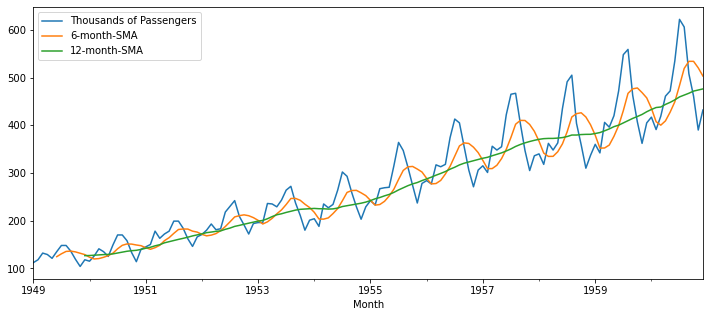

In [49]:
airline.plot(figsize = (12, 5))

#### Create EWMA-12

In [50]:
airline["EWMA-12"] = airline["Thousands of Passengers"].ewm(span = 12).mean()

<AxesSubplot:xlabel='Month'>

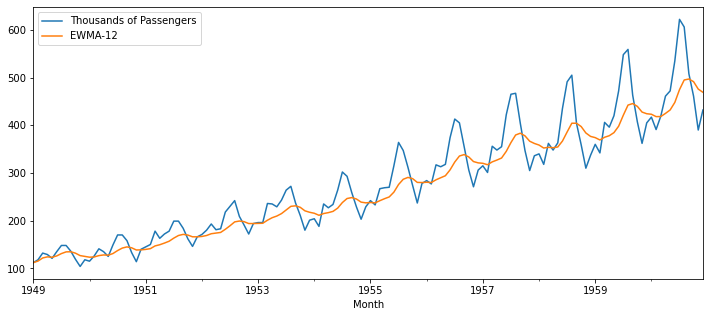

In [51]:
airline[["Thousands of Passengers", "EWMA-12"]].plot(figsize = (12, 5))

#### Holt Winters Methods
EWMA fails to account  for other contributing factors like trend and seasonality 

#### Holt Winters Seasonal Method(Triple Exponential Smoothing) comprises of the forecast equation and 3 smooting equations
* Level
* Trend
* Seasonal

The Additive Method is preffered when the seasonal variations are roughly  constant through the series , while the multiplicative  method is preferred when  the seasonal variations are changing proportional  to the level  of the series

In [55]:
df = airline[["Thousands of Passengers"]]

In [59]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [60]:
#### Set the Index Frequency to Month

In [61]:
df.index.freq = "MS"

In [62]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [63]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing 

C:\Users\Christian\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\Users\Christian\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [64]:
span = 12
alpha = 2/(span + 1)

#### EWMA using ewm

In [65]:
df["EWMA12"] = df["Thousands of Passengers"].ewm(alpha = alpha, adjust  = False).mean()

C:\Users\CHRIST~1\AppData\Local\Temp/ipykernel_13056/574670621.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["EWMA12"] = df["Thousands of Passengers"].ewm(alpha = alpha, adjust  = False).mean()


In [66]:
df.head()

,Thousands of Passengers,EWMA12
Month,,
1949-01-01,112,112.000000
1949-02-01,118,112.923077
1949-03-01,132,115.857988
1949-04-01,129,117.879836
1949-05-01,121,118.359861


#### EWMA using Simple Exponential Smoothing

In [71]:
model = SimpleExpSmoothing(df["Thousands of Passengers"])

C:\Users\Christian\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [74]:
fitted_Model = model.fit(smoothing_level=alpha, optimized = False)

In [76]:
fitted_Model.fittedvalues.shift(-1)

Month
1949-01-01    112.000000
1949-02-01    112.923077
1949-03-01    115.857988
1949-04-01    117.879836
1949-05-01    118.359861
                 ...    
1960-08-01    494.898619
1960-09-01    496.914216
1960-10-01    491.388952
1960-11-01    475.790652
1960-12-01           NaN
Freq: MS, Length: 144, dtype: float64

In [77]:
df["SES12"] = fitted_Model.fittedvalues.shift(-1)

C:\Users\CHRIST~1\AppData\Local\Temp/ipykernel_13056/248105999.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["SES12"] = fitted_Model.fittedvalues.shift(-1)


In [78]:
df.head()

,Thousands of Passengers,EWMA12,SES12
Month,,,
1949-01-01,112,112.000000,112.000000
1949-02-01,118,112.923077,112.923077
1949-03-01,132,115.857988,115.857988
1949-04-01,129,117.879836,117.879836
1949-05-01,121,118.359861,118.359861


In [79]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

#### Create 2 Double Exponential Smoothing

In [88]:
df["DES_Add_12"] = ExponentialSmoothing(df["Thousands of Passengers"], trend = "add").fit().fittedvalues.shift(-1)
df["DES_Mul_12"] = ExponentialSmoothing(df["Thousands of Passengers"], trend = "mul").fit().fittedvalues.shift(-1)

C:\Users\Christian\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\Christian\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [89]:
df.head()

,Thousands of Passengers,EWMA12,SES12,DES_Add_12,DES_Mul_12
Month,,,,,
1949-01-01,112,112.000000,112.000000,114.221156,112.688538
1949-02-01,118,112.923077,112.923077,120.175837,118.725424
1949-03-01,132,115.857988,115.857988,134.115056,132.811491
1949-04-01,129,117.879836,117.879836,131.244976,129.793048
1949-05-01,121,118.359861,118.359861,123.283465,121.743867


<AxesSubplot:xlabel='Month'>

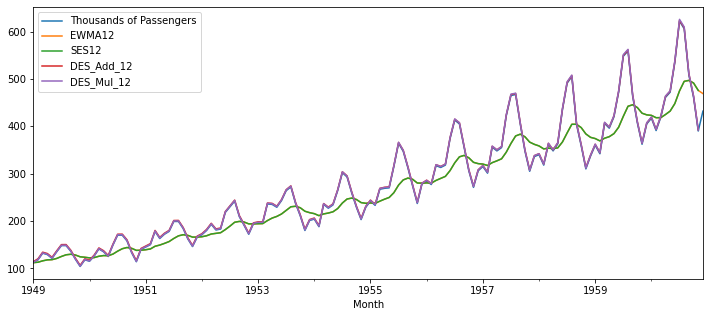

In [90]:
df.plot()

In [91]:
df.columns

Index(['Thousands of Passengers', 'EWMA12', 'SES12', 'DES_Add_12',
       'DES_Mul_12'],
      dtype='object')

<AxesSubplot:xlabel='Month'>

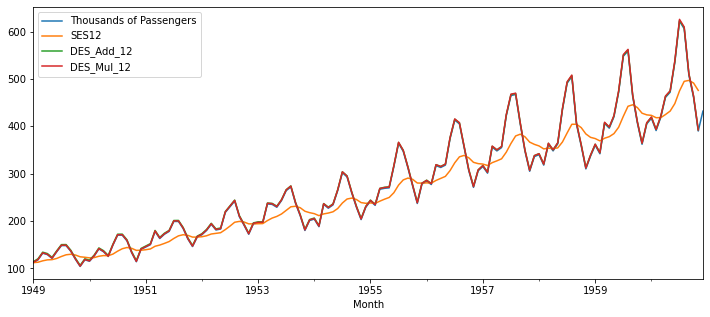

In [92]:
df[['Thousands of Passengers', 'SES12', 'DES_Add_12', 'DES_Mul_12']].plot()

<AxesSubplot:xlabel='Month'>

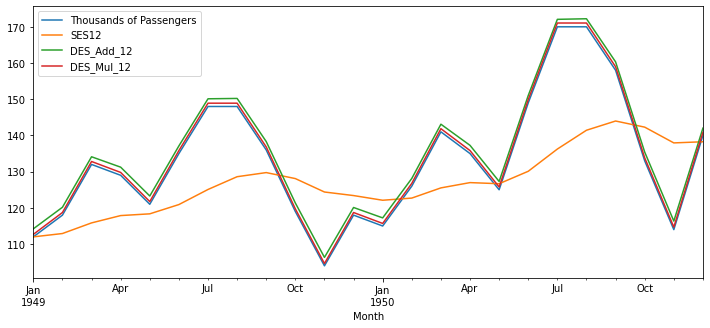

In [93]:
df[['Thousands of Passengers', 'SES12', 'DES_Add_12', "DES_Mul_12"]].iloc[:24].plot()

#### Triple Exponential Smoothing

In [95]:
df["TES_mul_12"] = ExponentialSmoothing(df["Thousands of Passengers"], trend = "mul", seasonal = "mul", seasonal_periods= 12).fit().fittedvalues

C:\Users\Christian\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\Christian\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:80: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


<AxesSubplot:xlabel='Month'>

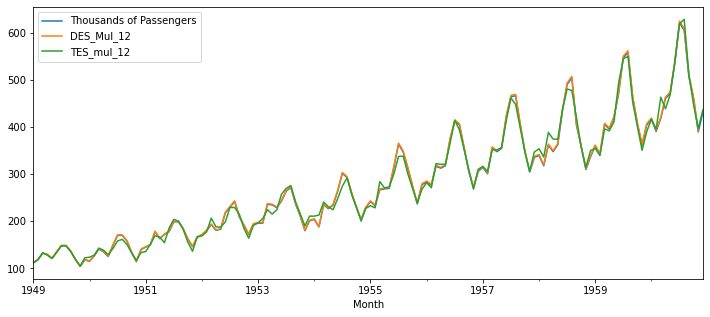

In [97]:
df[['Thousands of Passengers', "DES_Mul_12", "TES_mul_12"]].plot()

#### How is the DES performed against TES for the first 24 months?

<AxesSubplot:xlabel='Month'>

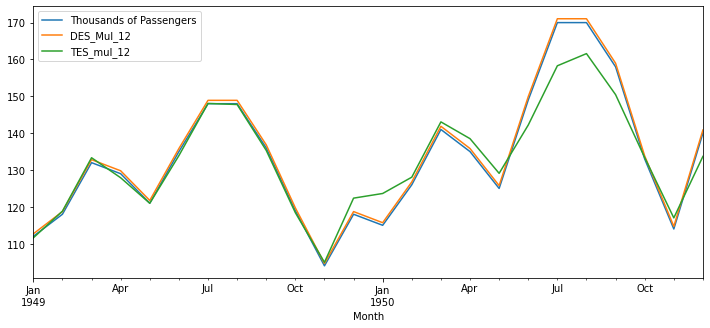

In [96]:
df[['Thousands of Passengers', "DES_Mul_12", "TES_mul_12"]].iloc[:24].plot()

#### How is the DES performed against TES for the last 24 months?

<AxesSubplot:xlabel='Month'>

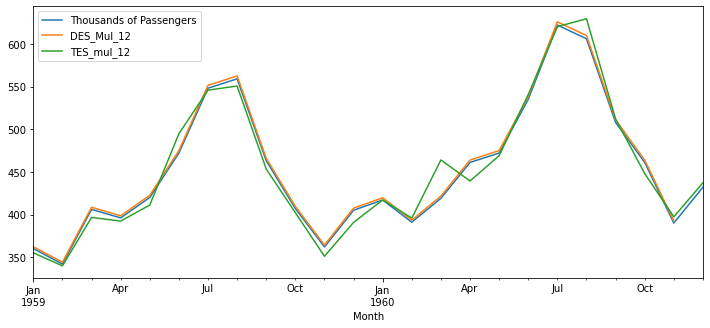

In [98]:
df[['Thousands of Passengers', "DES_Mul_12", "TES_mul_12"]].iloc[-24:].plot()

# Statsmodels Time Series Excercises
For this set of exercises we're using data from the Federal Reserve Economic Database (FRED) concerning the Industrial Production Index for Electricity and Gas Utilities from January 1970 to December 1989.

Data source: https://fred.stlouisfed.org/series/IPG2211A2N

In [99]:
df = pd.read_csv('./UDEMY_TSA_FINAL/Data/EnergyProduction.csv',index_col=0,parse_dates=True)
df.head()

,EnergyIndex
DATE,
1970-01-01,43.0869
1970-02-01,42.5577
1970-03-01,41.6215
1970-04-01,40.1982
1970-05-01,39.9321


### 1. Assign a frequency of 'MS' to the DatetimeIndex.

In [100]:
df.index.freq = "MS"
df.index

DatetimeIndex(['1970-01-01', '1970-02-01', '1970-03-01', '1970-04-01',
               '1970-05-01', '1970-06-01', '1970-07-01', '1970-08-01',
               '1970-09-01', '1970-10-01',
               ...
               '1989-03-01', '1989-04-01', '1989-05-01', '1989-06-01',
               '1989-07-01', '1989-08-01', '1989-09-01', '1989-10-01',
               '1989-11-01', '1989-12-01'],
              dtype='datetime64[ns]', name='DATE', length=240, freq='MS')

### 2. Plot the dataset.

<AxesSubplot:xlabel='DATE'>

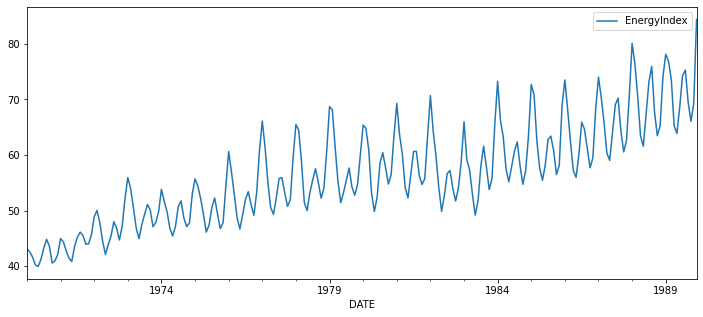

In [101]:
df.plot(figsize = (12, 5))

### 3. Add a column that shows a 12-month Simple Moving Average (SMA).<br>&nbsp;&nbsp;&nbsp;&nbsp;Plot the result.

In [105]:
df["SMA12"] = df["EnergyIndex"].rolling(window = 12).mean()

<AxesSubplot:xlabel='DATE'>

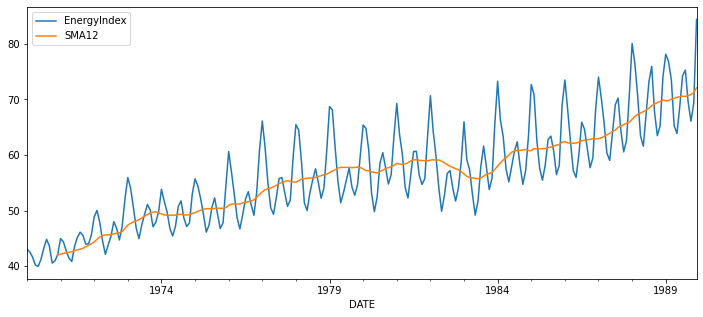

In [106]:
df[['EnergyIndex', "SMA12"]].plot()

### 4. Add a column that shows an Exponentially Weighted Moving Average (EWMA) with a span of 12 using the statsmodels <tt>SimpleExpSmoothing</tt> function. Plot the result.

In [107]:
span = 12
alpha = 2/(span + 1)

In [108]:
model = SimpleExpSmoothing(df["EnergyIndex"])
fitted_Model = model.fit(smoothing_level=alpha, optimized = False)
df['SES12'] = fitted_Model.fittedvalues.shift(-1)

C:\Users\Christian\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


### 5. Add a column to the DataFrame that shows a Holt-Winters fitted model using Triple Exponential Smoothing with multiplicative models. Plot the result.

<AxesSubplot:xlabel='DATE'>

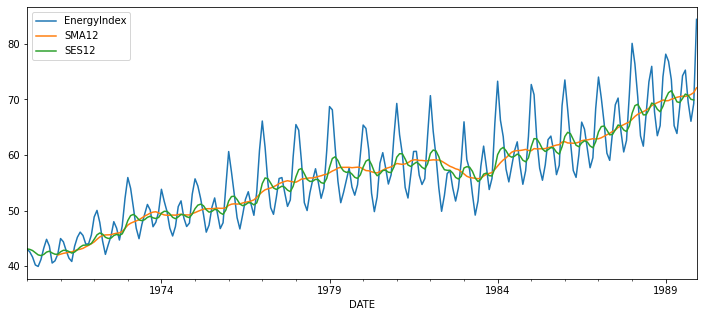

In [109]:
df.plot()

### 5. Add a column to the DataFrame that shows a Holt-Winters fitted model using Triple Exponential Smoothing with multiplicative models. Plot the result.

In [111]:
df["TESmul12"] = ExponentialSmoothing(df["EnergyIndex"], trend = "mul", seasonal = "mul", seasonal_periods= 12).fit().fittedvalues

<AxesSubplot:xlabel='DATE'>

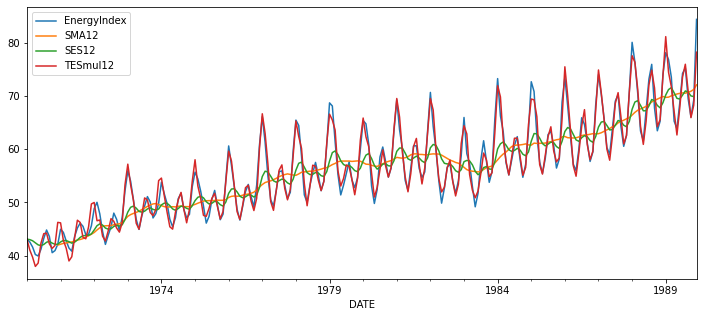

In [112]:
df.plot()

### OPTIONAL: Plot the same  as above, but for only the first two years.

In [114]:
df["TESmul12"] = ExponentialSmoothing(df["EnergyIndex"], trend = "mul", seasonal = "mul", seasonal_periods= 12).fit().fittedvalues

C:\Users\Christian\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


<AxesSubplot:xlabel='DATE'>

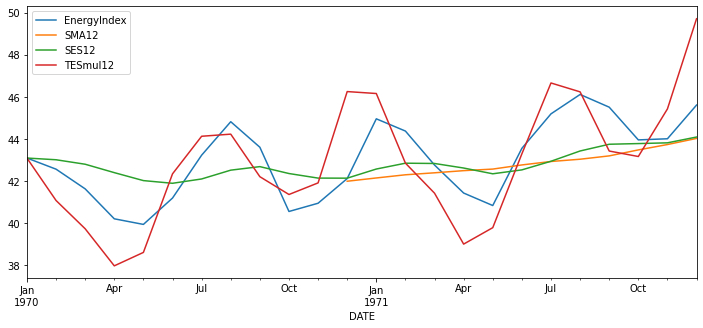

In [116]:
df.iloc[:24].plot()

### BONUS QUESTION: There is a visible decline in the Industrial Production Index around 1982-1983.<br>Why do you think this might be?

<AxesSubplot:xlabel='DATE'>

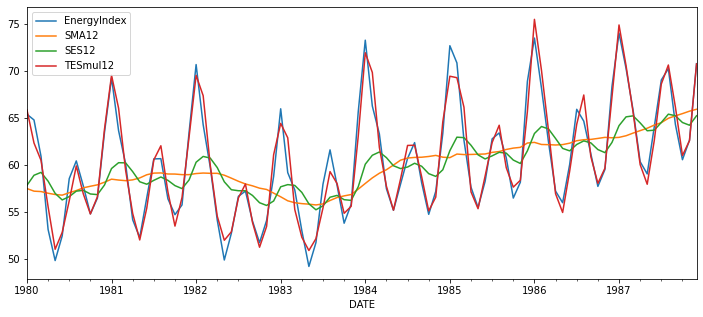

In [120]:
df.iloc[120:-24].plot()